In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import country_converter as coco
import geopandas as gpd
from geopandas import GeoDataFrame


#import needed libraries

## Happiness.csv

In [427]:
happiness_file = "./data/Happiness.csv"
happiness_df = pd.read_csv(happiness_file, header=0)
#load and profile data
print(happiness_df.head())
print(happiness_df.tail())
print(happiness_df.shape)

  Country name Regional indicator  Ladder score  \
0      Finland     Western Europe        7.8087   
1      Denmark     Western Europe        7.6456   
2  Switzerland     Western Europe        7.5599   
3      Iceland     Western Europe        7.5045   
4       Norway     Western Europe        7.4880   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                        0.031156      7.869766      7.747634   
1                        0.033492      7.711245      7.579955   
2                        0.035014      7.628528      7.491272   
3                        0.059616      7.621347      7.387653   
4                        0.034837      7.556281      7.419719   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0              10.639267        0.954330                71.900825   
1              10.774001        0.955991                72.402504   
2              10.979933        0.942847                74.102448   
3              10.772559  

In [428]:
print(happiness_df.duplicated().sum())
# check for duplicates

0


In [429]:
print(happiness_df.columns)
# verify column names

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')


## world-happiness-report.csv

In [430]:
world_happiness_file = "./data/world-happiness-report.csv"
world_happiness_df = pd.read_csv(world_happiness_file, header=0)
#load and profile data
print(world_happiness_df.head())
print(world_happiness_df.tail())
print(world_happiness_df.shape)

  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  
0        

In [431]:
print(world_happiness_df.duplicated().sum())
# check for duplicate and null values
print(world_happiness_df.isnull().values.any())
print(world_happiness_df.isnull().values.sum())

0
True
373


In [432]:
print(world_happiness_df.columns)
# verify columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')


## world-happiness-report-2021.csv

In [433]:
world_happiness2021_file = "./data/world-happiness-report-2021.csv"
world_happiness2021_df = pd.read_csv(world_happiness2021_file, header=0)
# load and profile data
print(world_happiness2021_df.head())
print(world_happiness2021_df.tail())
print(world_happiness2021_df.shape)

  Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878  

In [434]:
print(world_happiness2021_df.duplicated().sum())
# check for duplicates and null values
print(world_happiness2021_df.isnull().values.any())
print(world_happiness2021_df.isnull().values.sum())

0
False
0


In [435]:
print(world_happiness2021_df.columns)
# verify columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')


## countries_quality_of_life_index.18-10-2021.csv

In [436]:
quality_index_file = "./data/countries_quality_of_life_index.18-10-2021.csv"
quality_index_df = pd.read_csv(quality_index_file, header=0)
# load and profile data
print(quality_index_df.head())
print(quality_index_df.tail())
print(quality_index_df.shape)

      Name         "NativeName"   "QualityOfLifeIndex"
0   Canada             "Canada"             159.511902
1    Japan                 "日本"             165.326905
2   Norway   "Kongeriket Norge"             173.158166
3  Ireland               "Eire"             153.182191
4  Hungary       "Magyarorszag"             135.343937
                           Name                    "NativeName"  \
110               Cote d'Ivoire   "Republique de Cote d'Ivoire"   
111                     Morocco                        "المغرب"   
112                     Nigeria                      "Nijeriya"   
113  Kingdom of the Netherlands    "Koninkrijk der Nederlanden"   
114                Danish Realm            "Kongeriget Danmark"   

      "QualityOfLifeIndex"  
110              24.341801  
111             106.065829  
112              53.089911  
113             182.535902  
114             188.635667  
(115, 3)


In [437]:
print(quality_index_df.duplicated().sum())
# check for duplicates and null values
print(quality_index_df.isnull().values.any())
print(quality_index_df.isnull().values.sum())

0
False
0


In [438]:
print(quality_index_df.columns)
# verify columns

Index(['Name', ' "NativeName"', ' "QualityOfLifeIndex"'], dtype='object')


## Quality of life in a country comparison.csv

In [439]:
quality_country_file = "./data/Quality of life in a country comparison.csv"
quality_country_df = pd.read_csv(quality_country_file, header=0)
# load and profile data
print(quality_country_df.head())
print(quality_country_df.tail())
print(quality_country_df.shape)

   Unnamed: 0  Rank      Country  Stability(15%)  Rights(20%)  Health(15%)  \
0           0     1    Australia              86           92           87   
1           1     2   San Marino              81           82           91   
2           2     3    Hong Kong              77           85          100   
3           3     4  Switzerland              91           99           93   
4           4     5        Macao              90           71          100   

   Safety(10%)  Climate(15%)  Costs(15%)  Popularity(10%)  \
0          100            90          23               41   
1           87            62          61               47   
2           97            49          61               41   
3           99            34          44               46   
4           93            48          61               44   

   TotalQuality of life(100%)  
0                          76  
1                          74  
2                          74  
3                          74  
4   

In [440]:
print(quality_country_df.duplicated().sum())
# check for duplicates and null values
print(quality_country_df.isnull().values.any())
print(quality_country_df.isnull().values.sum())

0
False
0


In [441]:
print(quality_country_df.columns)
# verify columns

Index(['Unnamed: 0', 'Rank', 'Country', 'Stability(15%)', 'Rights(20%)',
       'Health(15%)', 'Safety(10%)', 'Climate(15%)', 'Costs(15%)',
       'Popularity(10%)', 'TotalQuality of life(100%)'],
      dtype='object')


## Merge happiness_df and world_happiness2021_df as happiness_world2021

In [442]:
happiness_world2021 = pd.merge(happiness_df, world_happiness2021_df, on='Country name', how='left')
# merge data frames left outer merge to help compare differences to make priority values
# print(happiness_world2021.head())
print(happiness_world2021.tail())
print(happiness_world2021.shape)
# print(happiness_world2021.columns)
# profile merged data frame

                 Country name Regional indicator_x  Ladder score_x  \
148  Central African Republic   Sub-Saharan Africa          3.4759   
149                    Rwanda   Sub-Saharan Africa          3.3123   
150                  Zimbabwe   Sub-Saharan Africa          3.2992   
151               South Sudan   Sub-Saharan Africa          2.8166   
152               Afghanistan           South Asia          2.5669   

     Standard error of ladder score_x  upperwhisker_x  lowerwhisker_x  \
148                          0.115183        3.701658        3.250141   
149                          0.052425        3.415053        3.209547   
150                          0.058674        3.414202        3.184198   
151                          0.107610        3.027516        2.605684   
152                          0.031311        2.628270        2.505530   

     Logged GDP per capita_x  Social support_x  Healthy life expectancy_x  \
148                 6.625160          0.319460                 

In [443]:
print(happiness_world2021.columns)
# verify columns after merge

Index(['Country name', 'Regional indicator_x', 'Ladder score_x',
       'Standard error of ladder score_x', 'upperwhisker_x', 'lowerwhisker_x',
       'Logged GDP per capita_x', 'Social support_x',
       'Healthy life expectancy_x', 'Freedom to make life choices_x',
       'Generosity_x', 'Perceptions of corruption_x',
       'Ladder score in Dystopia_x', 'Explained by: Log GDP per capita_x',
       'Explained by: Social support_x',
       'Explained by: Healthy life expectancy_x',
       'Explained by: Freedom to make life choices_x',
       'Explained by: Generosity_x',
       'Explained by: Perceptions of corruption_x', 'Dystopia + residual_x',
       'Regional indicator_y', 'Ladder score_y',
       'Standard error of ladder score_y', 'upperwhisker_y', 'lowerwhisker_y',
       'Logged GDP per capita_y', 'Social support_y',
       'Healthy life expectancy_y', 'Freedom to make life choices_y',
       'Generosity_y', 'Perceptions of corruption_y',
       'Ladder score in Dystopia_y', 

## Get rid of unused not applicable data columns

In [444]:

happiness_world2021.drop([col for col in happiness_world2021.columns if '_y' in col],axis=1,inplace=True)
# drop "_y" columns because "_x" more up to date
drop_cols = ['Regional indicator_x', 'Standard error of ladder score_x', 'upperwhisker_x', 'lowerwhisker_x', 'Ladder score in Dystopia_x', 'Explained by: Log GDP per capita_x', 'Explained by: Social support_x', 'Explained by: Healthy life expectancy_x', 'Explained by: Freedom to make life choices_x', 'Explained by: Generosity_x', 'Explained by: Perceptions of corruption_x', 'Dystopia + residual_x' ]
happiness_world2021.drop(drop_cols, inplace=True, axis=1)
# drop columns that are not applicable
print(happiness_world2021.shape)
print(happiness_world2021.columns)
# profile data for verification

(153, 8)
Index(['Country name', 'Ladder score_x', 'Logged GDP per capita_x',
       'Social support_x', 'Healthy life expectancy_x',
       'Freedom to make life choices_x', 'Generosity_x',
       'Perceptions of corruption_x'],
      dtype='object')


In [445]:
happiness_world2021.columns = happiness_world2021.columns.str.rstrip('_x')
# clean up column names
print(happiness_world2021.isnull().values.any())
print(happiness_world2021.isnull().values.sum())
# check for null values
print(happiness_world2021.head())


False
0
  Country name  Ladder score  Logged GDP per capita  Social support  \
0      Finland        7.8087              10.639267        0.954330   
1      Denmark        7.6456              10.774001        0.955991   
2  Switzerland        7.5599              10.979933        0.942847   
3      Iceland        7.5045              10.772559        0.974670   
4       Norway        7.4880              11.087804        0.952487   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                71.900825                      0.949172   -0.059482   
1                72.402504                      0.951444    0.066202   
2                74.102448                      0.921337    0.105911   
3                73.000000                      0.948892    0.246944   
4                73.200783                      0.955750    0.134533   

   Perceptions of corruption  
0                   0.195445  
1                   0.168489  
2                   0.303728  
3       

In [446]:
print(happiness_world2021.isnull().sum())
# check sum of null values if any

Country name                    0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


In [447]:
# pd.set_option('precision', 2)
# round all values to 2 decimal points
happiness_world2021 = happiness_world2021.round(decimals = 2)
print(happiness_world2021.head())

  Country name  Ladder score  Logged GDP per capita  Social support  \
0      Finland          7.81                  10.64            0.95   
1      Denmark          7.65                  10.77            0.96   
2  Switzerland          7.56                  10.98            0.94   
3      Iceland          7.50                  10.77            0.97   
4       Norway          7.49                  11.09            0.95   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                     71.9                          0.95       -0.06   
1                     72.4                          0.95        0.07   
2                     74.1                          0.92        0.11   
3                     73.0                          0.95        0.25   
4                     73.2                          0.96        0.13   

   Perceptions of corruption  
0                       0.20  
1                       0.17  
2                       0.30  
3               

## Save happiness_world2021 to csv

In [450]:
# write original clean happiness df to csv
happiness_world2021.to_csv('./data/world_happiness_clean.csv', encoding='utf-8', index=False)

## Plot line graph of happiness by country top 10

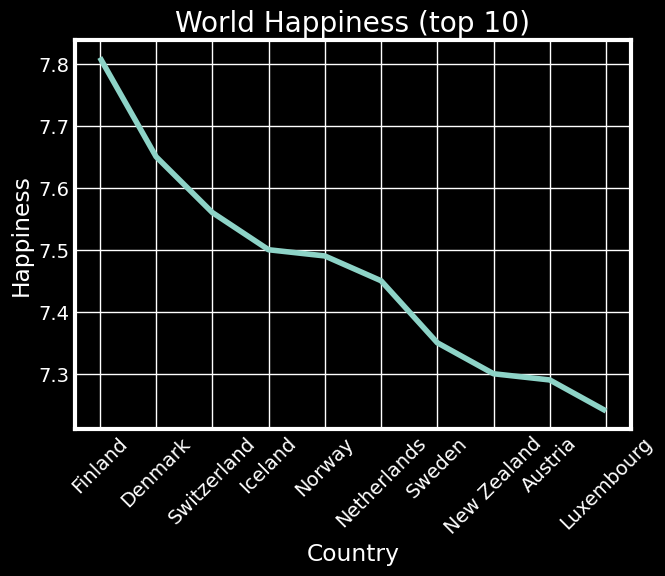

In [448]:
#visualization ladder score line chart
plt.style.use('dark_background')

# 1st arg is column for x-axis, 2nd arg is column for y-axis
plt.plot(happiness_world2021['Country name'][:10], happiness_world2021['Ladder score'][:10])

# give the chart a title
plt.title("World Happiness (top 10)")

# label the x and y axes
plt.xlabel('Country')
plt.ylabel('Happiness')
plt.xticks(rotation= 45)



# show the chart
plt.show()


## Plot pie chart of average life expectancy per country top 10

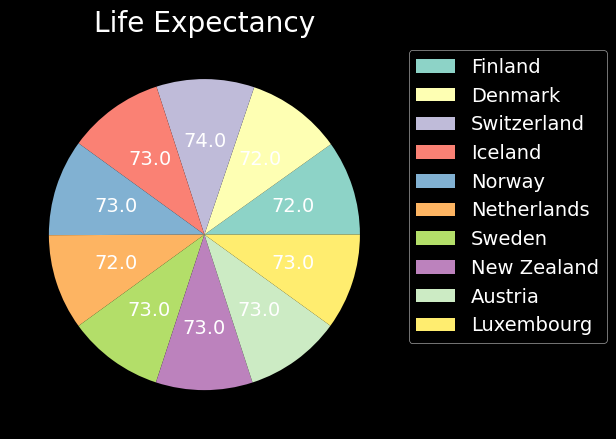

In [449]:
# visualization pie chart life expectancy

y = happiness_world2021['Healthy life expectancy'][:10]
country_labels = happiness_world2021['Country name'][:10]

def absolute_value(val):
    """take value and present it as absolute to show age instead of percentage

Args:
        value

Returns:
        absolute number
    """
    a  = np.round(val/100.*y.sum(), 0)
    return a

plt.title('Life Expectancy')
plt.pie(y, autopct = absolute_value)
plt.legend(country_labels, bbox_to_anchor=(1,1), loc= 'best')
plt.show() 

## Original map of happiness by country data

In [451]:

SHAPEFILE = './worldmap/ne_10m_admin_0_countries.shp'

# Read shapefile using Geopandas
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]

# Rename columns.
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df.head(3)

,country,country_code,geometry
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


<AxesSubplot:>

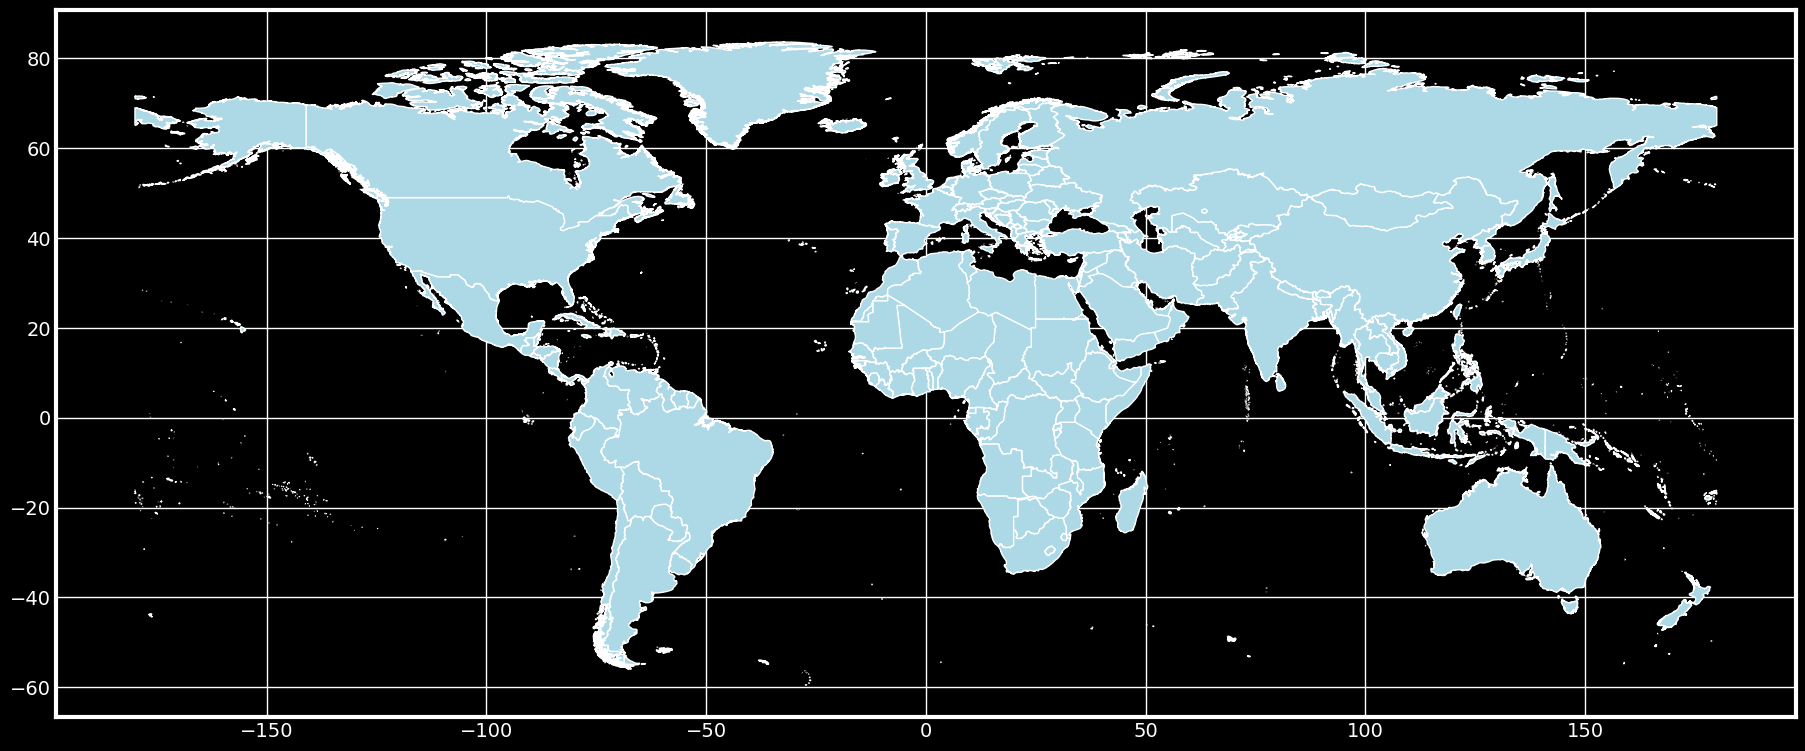

In [452]:
# Drop row for 'Antarctica'. It takes a lot of space in the map and is not of much use
geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)

# Print the map
geo_df.plot(figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')

In [453]:
# Next, we need to ensure that our data matches with the country codes. 
iso3_codes = geo_df['country'].to_list()

# Convert to iso3_codes
iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')

# Add the list with iso2 codes to the dataframe
geo_df['iso2_code'] = iso2_codes_list

# There are some countries for which the converter could not find a country code. 
# We will drop these countries.
geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)

Dhekelia Sovereign Base Area not found in regex
US Naval Base Guantanamo Bay not found in regex
Siachen Glacier not found in regex
Baykonur Cosmodrome not found in regex
Akrotiri Sovereign Base Area not found in regex
Southern Patagonian Ice Field not found in regex
Bir Tawil not found in regex
Indian Ocean Territories not found in regex
Coral Sea Islands not found in regex
Spratly Islands not found in regex
Clipperton Island not found in regex
Ashmore and Cartier Islands not found in regex
Bajo Nuevo Bank (Petrel Is.) not found in regex
Serranilla Bank not found in regex
Scarborough Reef not found in regex


In [526]:
happiness_world2021.columns = ['country', 'ladder_score', 'gdp', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']
print(happiness_world2021.head())
# print(geo_df[geo_df['country'].str.contains('United States')])
# print(geo_df.shape)
print(happiness_world2021.shape)

       country  ladder_score    gdp  social_support  life_expectancy  freedom  \
0      Finland          7.81  10.64            0.95             71.9     0.95   
1      Denmark          7.65  10.77            0.96             72.4     0.95   
2  Switzerland          7.56  10.98            0.94             74.1     0.92   
3      Iceland          7.50  10.77            0.97             73.0     0.95   
4       Norway          7.49  11.09            0.95             73.2     0.96   

   generosity  corruption  
0       -0.06        0.20  
1        0.07        0.17  
2        0.11        0.30  
3        0.25        0.71  
4        0.13        0.26  
(156, 8)


## Save happiness_world2021 - further cleaned version

In [ ]:
happiness_world2021.to_csv('./data/world_happiness_cleaner.csv', encoding='utf-8', index=False)

In [527]:
def us_convert(value):
  if value == 'United States of America':
    value = 'United States'
    return value
  else:
    return value

# function to convert values in df
# call function in map() function
geo_df['country'] = geo_df['country'].map(us_convert)

print(geo_df[geo_df['country'].str.contains('United States')])



                                  country country_code  \
154                         United States          USA   
204  United States Minor Outlying Islands          UMI   
208          United States Virgin Islands          VIR   

                                              geometry iso2_code  
154  MULTIPOLYGON (((-122.75302 48.99251, -122.6532...        US  
204  MULTIPOLYGON (((-169.53026 16.76020, -169.5208...        UM  
208  MULTIPOLYGON (((-64.55940 17.75161, -64.58519 ...        VI  


## Missing Data - to be filled

In [528]:
# found missing row data and added row to fill blank
happiness_world2021 = happiness_world2021.append({'country': 'Sudan', 'ladder_score': 2.83, 'gdp': 7.40, 'social_support': 0.50, 'life_expectancy': 51.0, 'freedom': 0.43, 'generosity': 0.02, 'corruption': 0.76}, ignore_index=True)

In [529]:
# found missing row data and added row to fill blank
happiness_world2021 = happiness_world2021.append({'country': 'Angola', 'ladder_score': 2.8, 'gdp': 6.40, 'social_support': 0.49, 'life_expectancy': 50.0, 'freedom': 0.43, 'generosity': 0.02, 'corruption': 0.76}, ignore_index=True)

In [530]:
# found missing row data and added row to fill blank
happiness_world2021 = happiness_world2021.append({'country': 'Somalia', 'ladder_score': 1.7, 'gdp': 7.6, 'social_support': 0.40, 'life_expectancy': 57.0, 'freedom': 0.70, 'generosity': 0.02, 'corruption': 0.91}, ignore_index=True)

## Continue Mapping process below

In [531]:
# functions to convert row strings to work better with merging

def congo_convert1(value):
  if value == 'Democratic Republic of the Congo':
    value = 'Congo (Kinshasa)'
    return value
  else:
    return value

def congo_convert2(value):
  if value == 'Republic of the Congo':
    value = 'Congo (Brazzaville)'
    return value
  else:
    return value

def tanzania_convert(value):
  if value == 'United Republic of Tanzania':
    value = 'Tanzania'
    return value
  else:
    return value

geo_df['country'] = geo_df['country'].map(congo_convert1)

geo_df['country'] = geo_df['country'].map(congo_convert2)

print(geo_df[geo_df['country'].str.contains('Congo')])

geo_df['country'] = geo_df['country'].map(tanzania_convert)

print(geo_df[geo_df['country'].str.contains('Tanzania')])

                country country_code  \
30  Congo (Brazzaville)          COG   
31     Congo (Kinshasa)          COD   

                                             geometry iso2_code  
30  POLYGON ((18.62639 3.47687, 18.63455 3.44922, ...        CG  
31  MULTIPOLYGON (((18.62639 3.47687, 18.59300 3.7...        CD  
     country country_code                                           geometry  \
18  Tanzania          TZA  MULTIPOLYGON (((32.92086 -9.40790, 32.90546 -9...   

   iso2_code  
18        TZ  


In [460]:
# congo, tanzania, angola, somalia

#checking for blank countries to fill in gaps

# print(geo_df[geo_df['country'].str.contains('Congo')])
# print(happiness_world2021[happiness_world2021['country'].str.contains('Congo')])

# print(geo_df[geo_df['country'].str.contains('Sudan')])
# print(happiness_world2021[happiness_world2021['country'].str.contains('Sudan')])

# print(geo_df[geo_df['country'].str.contains('Angola')])
# print(happiness_world2021[happiness_world2021['country'].str.contains('Angola')])

# print(geo_df[geo_df['country'].str.contains('Tanzania')])
# print(happiness_world2021[happiness_world2021['country'].str.contains('Cuba')])

# print(geo_df[geo_df['country'].str.contains('Somalia')])
# print(happiness_world2021[happiness_world2021['country'].str.contains('Somalia')])
# print(geo_df.shape)

Empty DataFrame
Columns: [country, ladder_score, gdp, social_support, life_expectancy, freedom, generosity, corruption]
Index: []


In [461]:
# # Merge the two dataframes
merged_geo_df = pd.merge(left = happiness_world2021, right = geo_df)

# # Delete some columns that we won't use
df = merged_geo_df.drop(['life_expectancy', 'freedom', 'corruption', 'gdp', 'social_support', 'generosity' ], axis=1)

#Create the indicator values
# df['ladder_score'] = round(df['ladder_score'], 2)
df['ladder_score'].fillna(0, inplace=True)
print(df.shape)
# print(df.head())

(148, 5)


## Map 1 Plot 

In [462]:

# convert to geodata frame
df = GeoDataFrame(df)

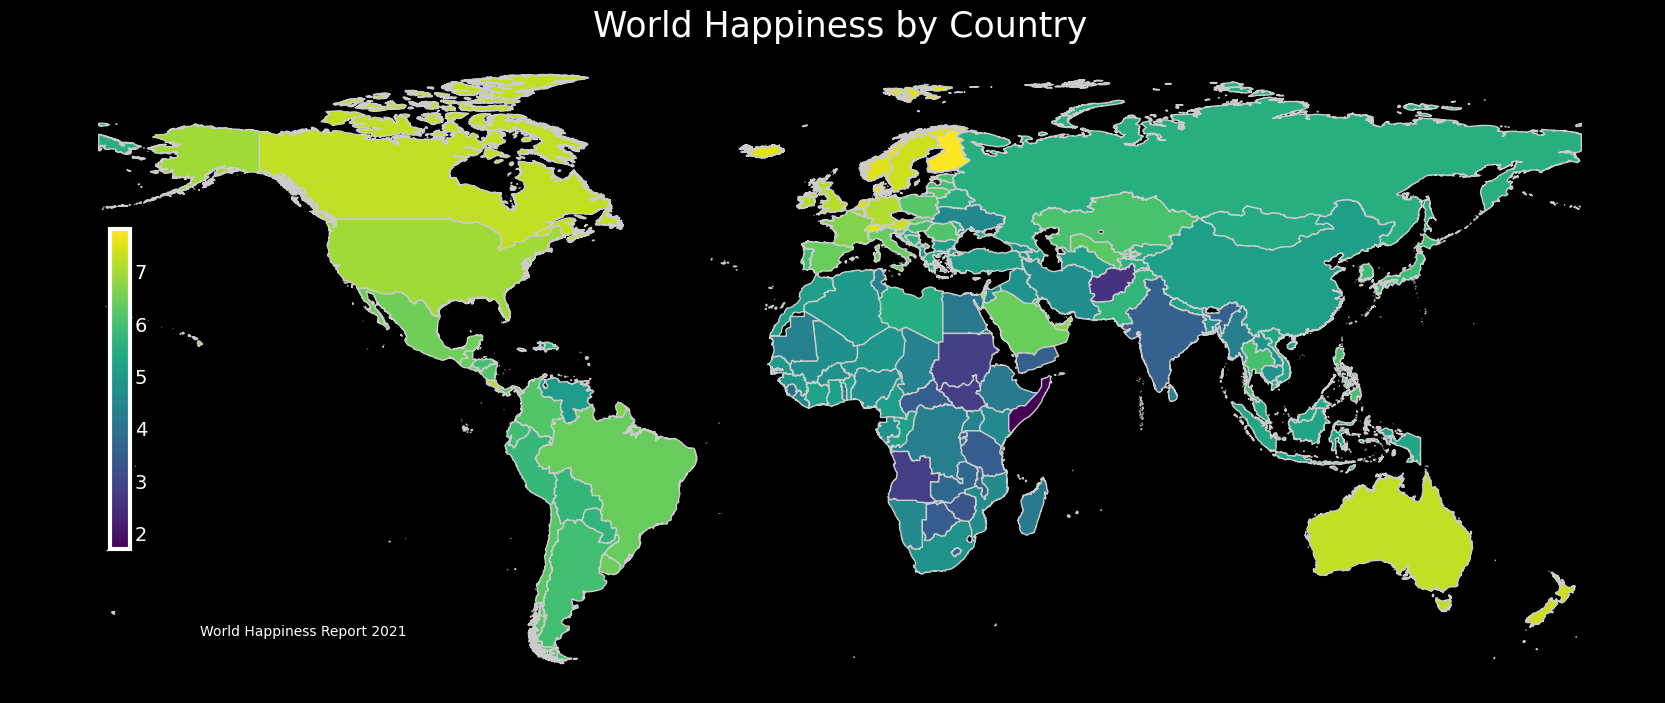

In [463]:
title = 'World Happiness by Country'
source = 'World Happiness Report 2021'
col = 'ladder_score'


# source = 'Source: relataly.com \nGrowth Rate = New cases / All previous cases'
vmin = df[col].min()
vmax = df[col].max()
cmap = 'viridis'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))

# Remove the axis
ax.axis('off')
df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='bottom', fontsize=10)

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

In [464]:
print(df.shape)

(148, 5)


In [532]:
# write csv of cleaner data
happiness_world2021.to_csv('./data/world_happiness_cleaner.csv', encoding='utf-8', index=False)

## cl_real_happiness.csv with heat map graphic

<AxesSubplot:>

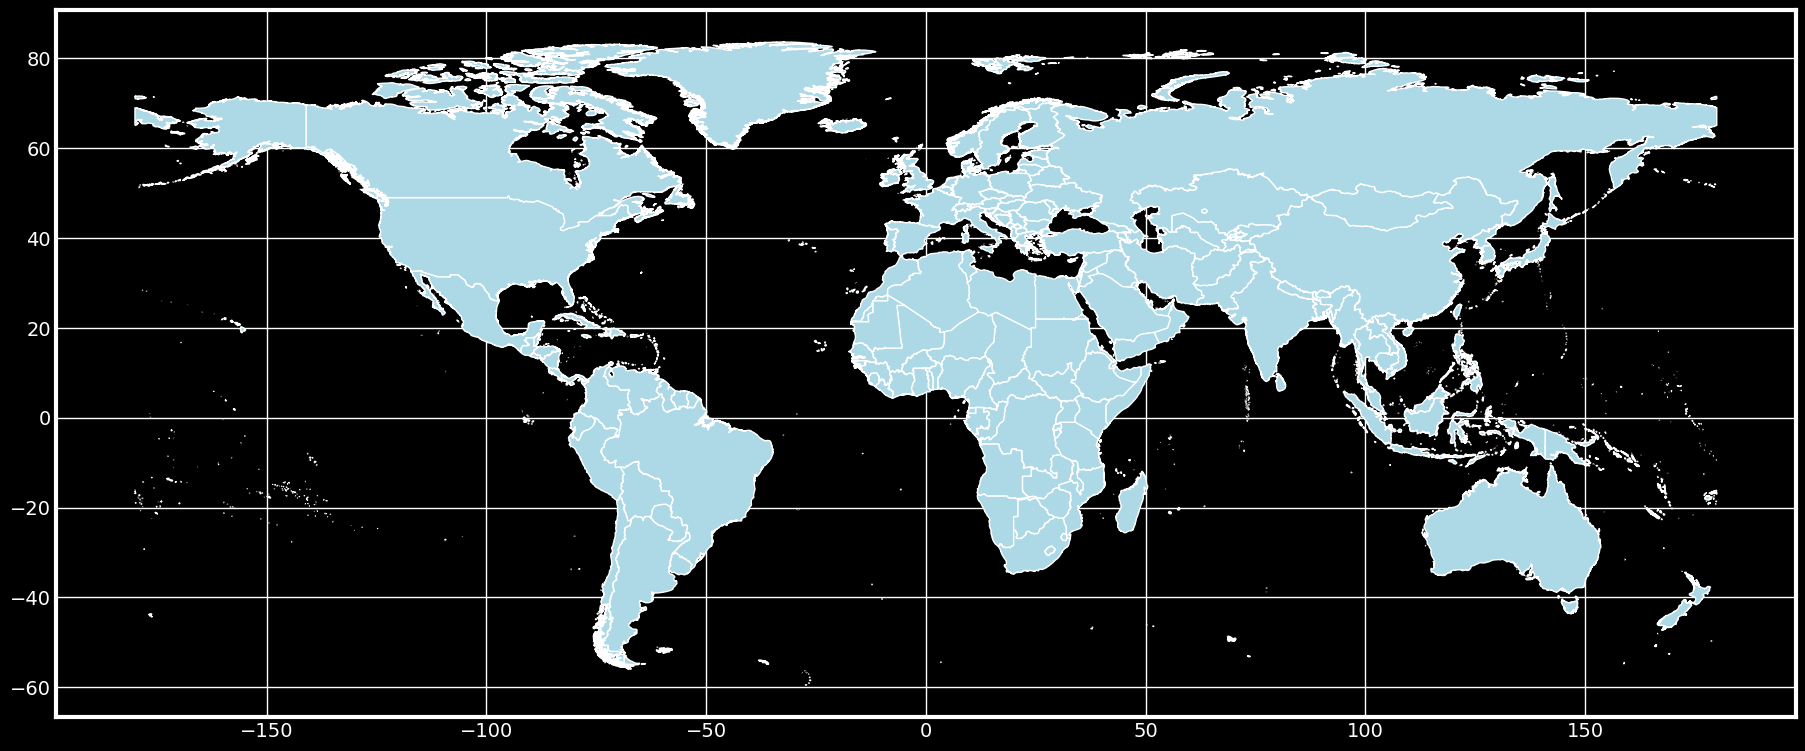

In [563]:
SHAPEFILE = './worldmap/ne_10m_admin_0_countries.shp'

# Read shapefile using Geopandas
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]

# Rename columns.
geo_df.columns = ['country', 'country_code', 'geometry']

# Drop row for 'Antarctica'. It takes a lot of space in the map and is not of much use
geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)

# Print the map
geo_df.plot(figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')


In [564]:
# Next, we need to ensure that our data matches with the country codes. 
iso3_codes = geo_df['country'].to_list()

# Convert to iso3_codes
iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')

# Add the list with iso2 codes to the dataframe
geo_df['iso2_code'] = iso2_codes_list

# Drop countries for which the converter could not find a country code. 
geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)


Dhekelia Sovereign Base Area not found in regex
US Naval Base Guantanamo Bay not found in regex
Siachen Glacier not found in regex
Baykonur Cosmodrome not found in regex
Akrotiri Sovereign Base Area not found in regex
Southern Patagonian Ice Field not found in regex
Bir Tawil not found in regex
Indian Ocean Territories not found in regex
Coral Sea Islands not found in regex
Spratly Islands not found in regex
Clipperton Island not found in regex
Ashmore and Cartier Islands not found in regex
Bajo Nuevo Bank (Petrel Is.) not found in regex
Serranilla Bank not found in regex
Scarborough Reef not found in regex


In [565]:

# read data file for mapping and group by country and ladder score
cl_real_file = "./data/cl_real_happiness.csv"
cl_real_happiness = pd.read_csv(cl_real_file, header=0)
cl_real_happiness = cl_real_happiness.groupby(by='country')['Ladder score (country)'].max()
cl_real_happiness = cl_real_happiness.reset_index()





print(geo_df[geo_df['country'].str.contains('United States')])
print(geo_df.shape)

# conversion for united states for merging
def us_convert(value):
  if value == 'United States of America':
    value = 'United States'
    return value
  else:
    return value

# calling conversion function
geo_df['country'] = geo_df['country'].map(us_convert)
# verify United States name
print(geo_df[geo_df['country'].str.contains('United States')])

                                  country country_code  \
154              United States of America          USA   
204  United States Minor Outlying Islands          UMI   
208          United States Virgin Islands          VIR   

                                              geometry iso2_code  
154  MULTIPOLYGON (((-122.75302 48.99251, -122.6532...        US  
204  MULTIPOLYGON (((-169.53026 16.76020, -169.5208...        UM  
208  MULTIPOLYGON (((-64.55940 17.75161, -64.58519 ...        VI  
(242, 4)
                                  country country_code  \
154                         United States          USA   
204  United States Minor Outlying Islands          UMI   
208          United States Virgin Islands          VIR   

                                              geometry iso2_code  
154  MULTIPOLYGON (((-122.75302 48.99251, -122.6532...        US  
204  MULTIPOLYGON (((-169.53026 16.76020, -169.5208...        UM  
208  MULTIPOLYGON (((-64.55940 17.75161, -64.58519 ...  

In [566]:
print(cl_real_happiness[cl_real_happiness['country'].str.contains('Sudan')])
print(geo_df[geo_df['country'].str.contains('Sudan')])

         country  Ladder score (country)
172  South Sudan                    2.82
175        Sudan                     NaN
        country country_code  \
14  South Sudan          SDS   
85        Sudan          SDN   

                                             geometry iso2_code  
14  POLYGON ((35.92084 4.61933, 35.85654 4.61960, ...        SS  
85  MULTIPOLYGON (((22.86106 10.91915, 22.90023 11...        SD  


In [567]:
#checking for blank countries to fill in gaps

# print(geo_df[geo_df['country'].str.contains('Congo')])
# print(cl_real_happiness[cl_real_happiness['country'].str.contains('Congo')])

# print(geo_df[geo_df['country'].str.contains('Sudan')])
# print(happiness_world2021[happiness_world2021['country'].str.contains('Sudan')])

# print(geo_df[geo_df['country'].str.contains('Angola')])
# print(cl_real_happiness[cl_real_happiness['country'].str.contains('Angola')])

# print(geo_df[geo_df['country'].str.contains('Tanzania')])
# print(cl_real_happiness[cl_real_happiness['country'].str.contains('Tanzania')])

    country country_code                                           geometry  \
101  Angola          AGO  MULTIPOLYGON (((13.07370 -4.63532, 13.06533 -4...   

    iso2_code  
101        AO  
  country  Ladder score (country)
4  Angola                     NaN


In [568]:
# functions to convert row strings to enable cohesive merging

def congo_convert1(value):
  if value == 'Democratic Republic of the Congo':
    value = 'Congo (Kinshasa)'
    return value
  else:
    return value

def congo_convert2(value):
  if value == 'Republic of the Congo':
    value = 'Congo (Brazzaville)'
    return value
  else:
    return value

def tanzania_convert(value):
  if value == 'United Republic of Tanzania':
    value = 'Tanzania'
    return value
  else:
    return value

geo_df['country'] = geo_df['country'].map(congo_convert1)

geo_df['country'] = geo_df['country'].map(congo_convert2)

print(geo_df[geo_df['country'].str.contains('Congo')])

geo_df['country'] = geo_df['country'].map(tanzania_convert)

print(geo_df[geo_df['country'].str.contains('Tanzania')])

print(geo_df[geo_df['country'].str.contains('Angola')])
print(cl_real_happiness[cl_real_happiness['country'].str.contains('Angola')])


                country country_code  \
30  Congo (Brazzaville)          COG   
31     Congo (Kinshasa)          COD   

                                             geometry iso2_code  
30  POLYGON ((18.62639 3.47687, 18.63455 3.44922, ...        CG  
31  MULTIPOLYGON (((18.62639 3.47687, 18.59300 3.7...        CD  
     country country_code                                           geometry  \
18  Tanzania          TZA  MULTIPOLYGON (((32.92086 -9.40790, 32.90546 -9...   

   iso2_code  
18        TZ  
    country country_code                                           geometry  \
101  Angola          AGO  MULTIPOLYGON (((13.07370 -4.63532, 13.06533 -4...   

    iso2_code  
101        AO  
  country  Ladder score (country)
4  Angola                     NaN


In [581]:
# Merge the two dataframes
merged_geo_df = pd.merge(left = cl_real_happiness, right = geo_df)

# Create the indicator values
# fill NaN values with average placeholder ladder score
merged_geo_df['Ladder score (country)'].fillna(4.5, inplace=True)
print(merged_geo_df.shape)

(186, 5)


In [582]:
print(merged_geo_df.head())

merge_geo_df = merged_geo_df.drop_duplicates()
print(merged_geo_df.shape)

       country  Ladder score (country) country_code  \
0  Afghanistan                    2.57          AFG   
1      Albania                    4.88          ALB   
2      Algeria                    5.01          DZA   
3      Andorra                    4.50          AND   
4       Angola                    4.50          AGO   

                                            geometry iso2_code  
0  POLYGON ((74.54235 37.02167, 74.54742 37.01567...        AF  
1  POLYGON ((20.56715 41.87318, 20.54172 41.86158...        AL  
2  POLYGON ((-4.82161 24.99506, -4.99519 25.10209...        DZ  
3  POLYGON ((1.70701 42.50278, 1.69750 42.49446, ...        AD  
4  MULTIPOLYGON (((13.07370 -4.63532, 13.06533 -4...        AO  
(186, 5)


## Map 2 plot

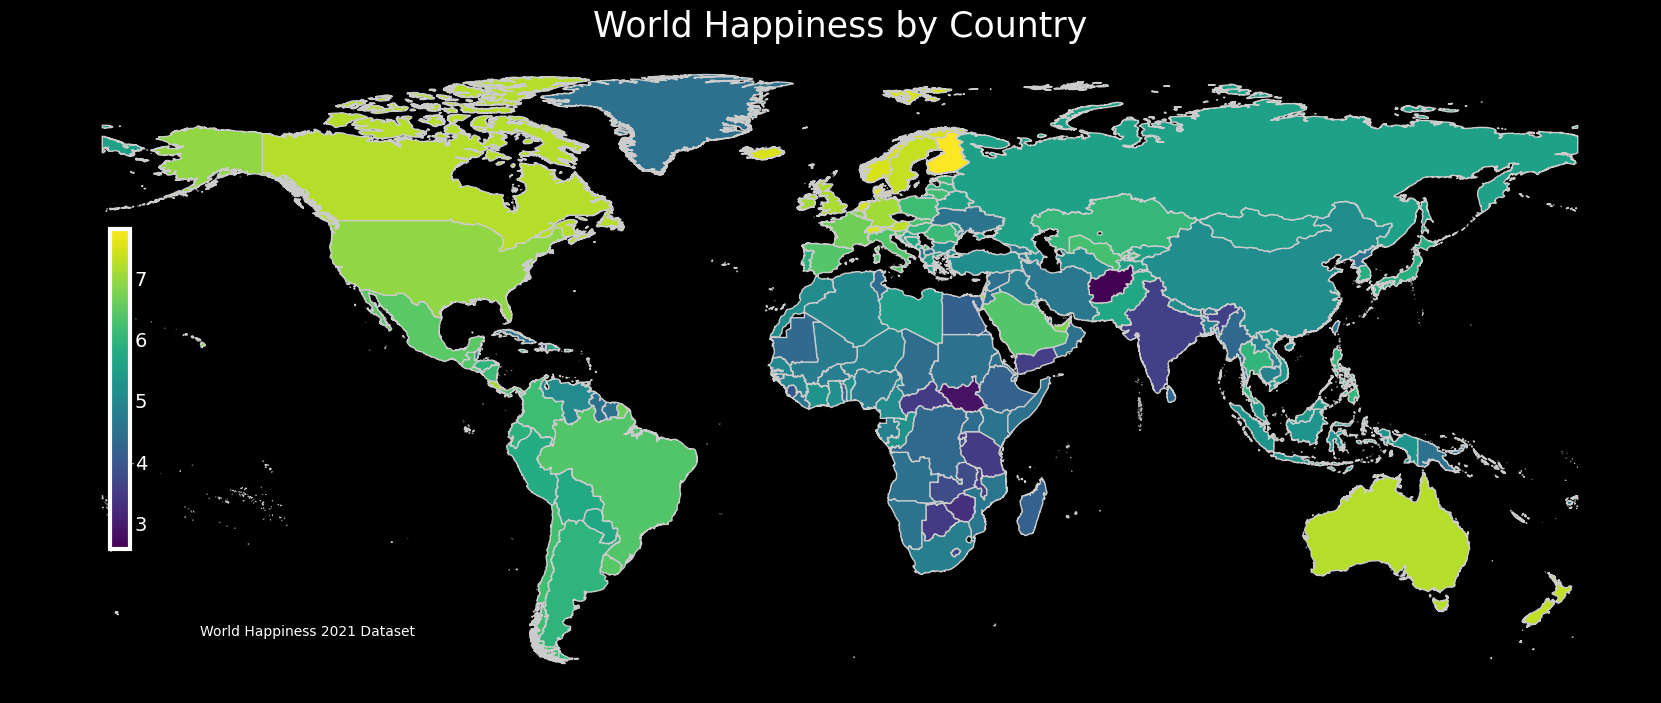

In [583]:
from geopandas import GeoDataFrame
# convert to geodata frame
merged_geo_df = GeoDataFrame(merged_geo_df)

title = 'World Happiness by Country'
source = 'World Happiness 2021 Dataset'
col = 'Ladder score (country)'

vmin = merged_geo_df[col].min()
vmax = merged_geo_df[col].max()
cmap = 'viridis'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))

# Remove the axis
ax.axis('off')
merged_geo_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='bottom', fontsize=10)

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)